In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [158]:
sales=pd.read_csv('bigmart_data.csv')
sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [159]:
sales.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [160]:
 sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


to fill the numerical values

In [161]:
sales['Item_Weight']=sales['Item_Weight'].fillna(sales['Item_Weight'].mean())

In [162]:
sales.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


to fill the catagorical values



In [163]:
sales['Outlet_Size']=sales['Outlet_Size'].fillna(sales['Outlet_Size'].mode()[0])

In [164]:
sales.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


**Data analysis**

In [165]:
sns.set()

<Figure size 600x600 with 0 Axes>

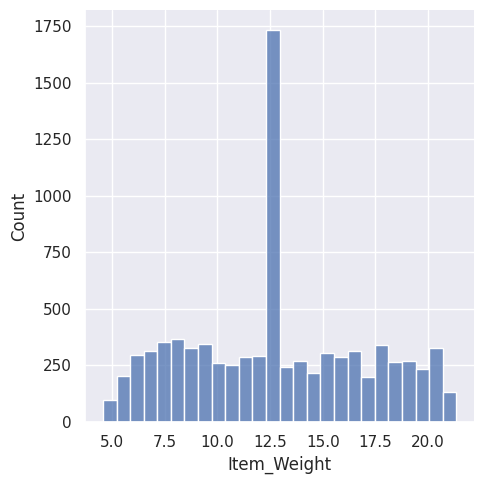

In [166]:
plt.figure(figsize=(6,6))
sns.displot(sales['Item_Weight'])
plt.show()

average weight is 12.5

<Figure size 600x600 with 0 Axes>

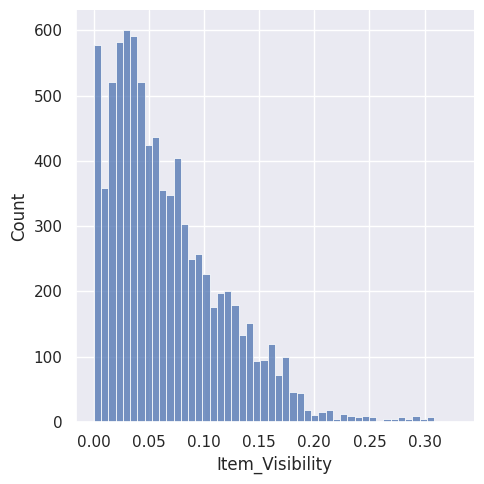

In [167]:
plt.figure(figsize=(6,6))
sns.displot(sales['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

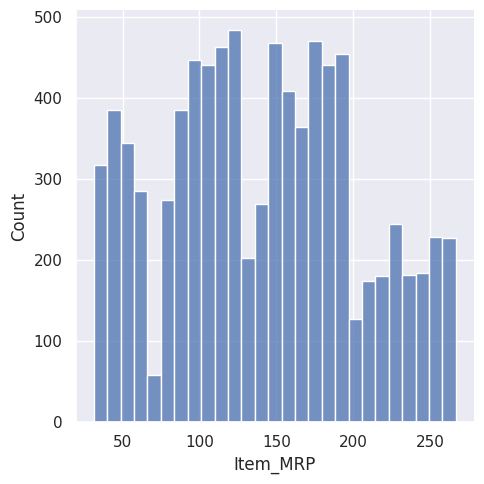

In [168]:
plt.figure(figsize=(6,6))
sns.displot(sales['Item_MRP'])
plt.show()

price value is more in 100

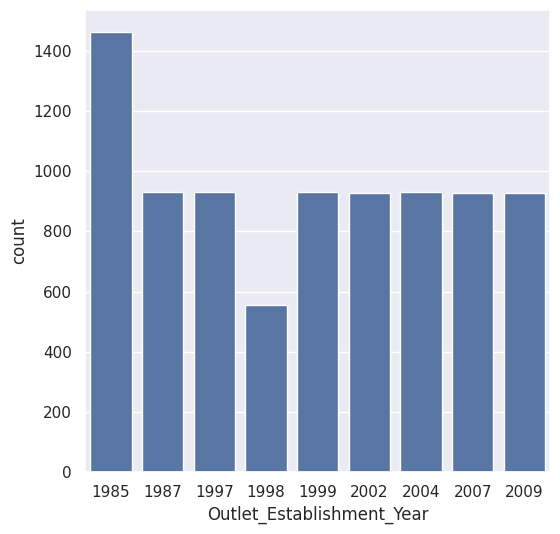

In [169]:
#Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=sales)
plt.show()

more no of product sold in 1985 and less in 1998

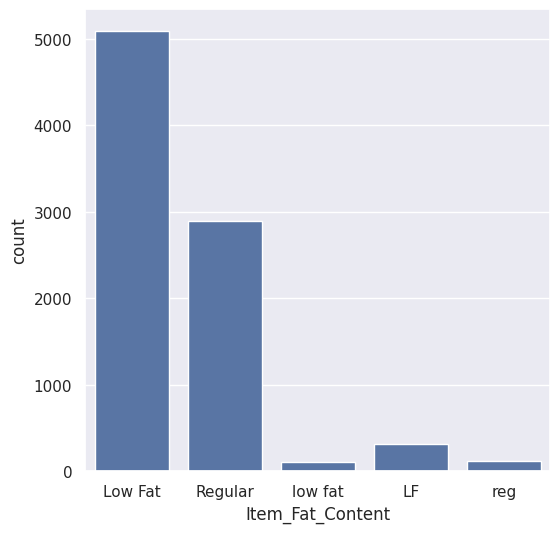

In [170]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=sales)
plt.show()

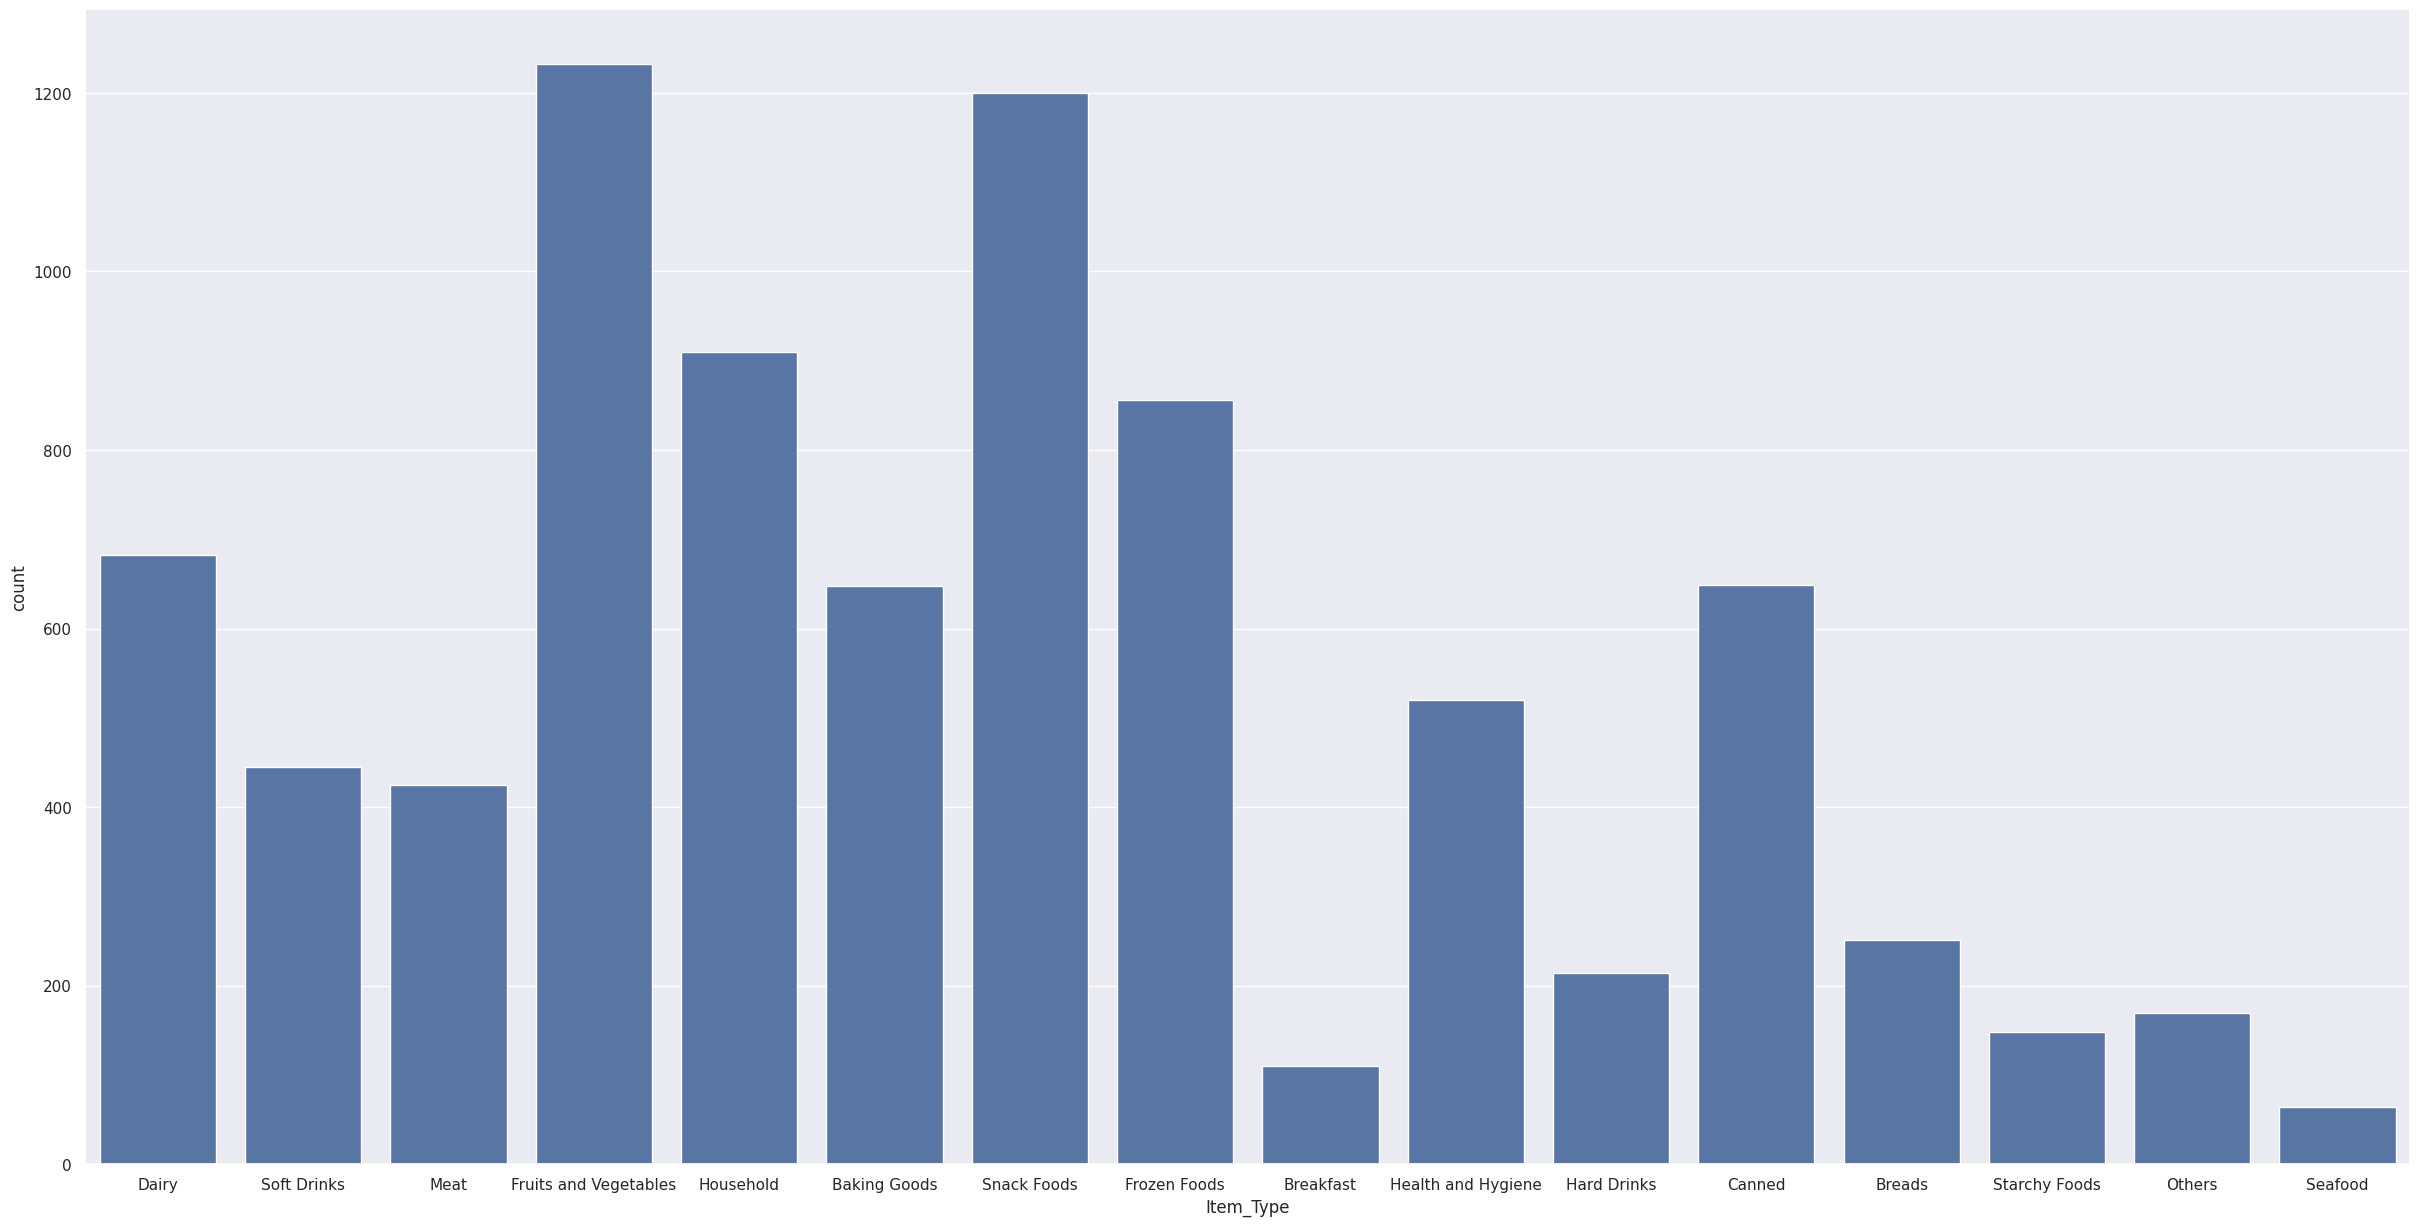

In [171]:
plt.figure(figsize=(30,15))
sns.countplot(x='Item_Type',data=sales)
plt.show()

In [172]:
sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [173]:
sales.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [174]:
sales['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [175]:
sales['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [176]:
sales.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

**Data preprocessing**

In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
le=LabelEncoder()

In [179]:
sales['Item_Fat_Content'] = le.fit_transform(sales['Item_Fat_Content'])
sales['Item_Type'] = le.fit_transform(sales['Item_Type'])
sales['Outlet_Identifier'] = le.fit_transform(sales['Outlet_Identifier'])
sales['Outlet_Location_Type'] = le.fit_transform(sales['Outlet_Location_Type'])
sales['Outlet_Type'] = le.fit_transform(sales['Outlet_Type'])

In [180]:
sales['Outlet_Size']=le.fit_transform(sales['Outlet_Size'])

In [181]:
sales['Item_Identifier']=le.fit_transform(sales['Item_Identifier'])

In [182]:
sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [184]:
x=sales.drop(columns='Item_Outlet_Sales',axis=1)
y=sales['Item_Outlet_Sales']

In [185]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [206]:
reg=LinearRegression()

In [207]:
reg.fit(X_train,Y_train)

LinearRegression()

In [208]:
train=reg.predict(X_train)

In [209]:
score=metrics.r2_score(Y_train,train)
print('the r2 score of train data:',score)

the r2 score of train data: 0.514058329918831


In [210]:
test=reg.predict(X_test)

In [211]:
score1=metrics.r2_score(Y_test,test)
print('the r2 score of test data:',score1)

the r2 score of test data: 0.49498230467979
